# Background on Scikit-Learn

`Scikit-learn` is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.

`Version 1.0 is a major change in this library. (Released on sep 2021)` - [Changelog](https://scikit-learn.org/stable/whats_new/v1.0.html#version-1-0)

This library is build upon `Scipy` - a scientific library for computing. The library can be categorised into:
1. Supervised learning - Classfication, Regression
2. Unsupervised learning - Clustering
3. Model selection and evaluation
4. Visualization
5. Data transformation
6. Dataset loading utilities

**The full details can be found** [here.](https://scikit-learn.org/stable/user_guide.html)

### Steps to follow for creating ML model and using it for prediction
1. Read the dataset
2. Do the analysis
3. Preprocessing step includes - removing outliers, structuring it, and converting it to a numerical dataset
4. Split the dataset into 3 parts - training, validation and test set
5. Select the ml algorithm needed for the task
6. Fit the training set and check the accuracy of training using validation set - Repeat this for n number of times
7. Interpret the model metrics after training
8. save the trained model for making prediction
9. predict the output from the test dataset and compare its accuracy.
--------
9. read new data for making prediction using trained model
10. use the same preprocessing step used earlier while training
11. load the saved model
12. make the prediction

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
from sklearn.datasets import load_wine

In [3]:
X = load_wine(as_frame=True)

In [4]:
X.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [5]:
print(X['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [6]:
X['data']

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [7]:
X['data'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [8]:
X['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [9]:
X['frame'].groupby('target').sample(48)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
35,13.48,1.81,2.41,20.5,100.0,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
33,13.76,1.53,2.70,19.5,132.0,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235.0,0
54,13.74,1.67,2.25,16.4,118.0,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,13.52,3.17,2.72,23.5,97.0,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520.0,2
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0,2
150,13.50,3.12,2.62,24.0,123.0,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500.0,2
144,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855.0,2


In [10]:
X_sampled = X['frame'].groupby('target').sample(48).values

In [11]:
X_sampled.shape

(144, 14)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled[:,:-1], X_sampled[:,-1], test_size=0.33, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [16]:
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
clf = RandomForestClassifier(n_estimators=20)
clf.fit(X_train_transformed, y_train)

RandomForestClassifier(n_estimators=20)

In [19]:
clf.score(X_test_transformed, y_test)

0.9583333333333334

In [20]:
predicted = clf.predict(X_test_transformed)

In [21]:
pd.DataFrame({'Ground Truth': pd.Series(y_test), 'Predicted': pd.Series(predicted)})

,Ground Truth,Predicted
0,2.0,2.0
1,0.0,0.0
2,1.0,1.0
3,2.0,2.0
4,1.0,1.0
5,0.0,0.0
6,2.0,2.0
7,1.0,0.0
8,1.0,2.0
9,0.0,0.0


In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
cm = confusion_matrix(y_true=y_test, y_pred=predicted) 

In [24]:
clf.classes_

array([0., 1., 2.])

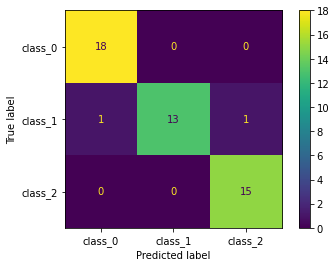

In [25]:
disp = ConfusionMatrixDisplay(cm, display_labels=['class_0', 'class_1', 'class_2'])
disp.plot()